In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


## 1) Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,silhouette_score

## 2) E.D.A

#### 2.1) Basic Checks and Summary

In [3]:
df = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 11)

In [5]:
df.size

593340

In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
# Unnamed column is not required we will drop this column.

df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- We can see in describe that the columns (x,y,z) have minimum value of 0 which is not possible, it indicates about missing data.
- Let's Check.

In [9]:
df.loc[(df.x==0) | (df.y==0) | (df.z==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [10]:
len(df.loc[(df.x==0) | (df.y==0) | (df.z==0)])

20

- **20 rows are very less compared to 53940 rows, will not affect in model.**
- **We will Drop them.**

In [11]:
df = df[(df[['x','y','z']]!=0).all(axis=1)]

## Visualization

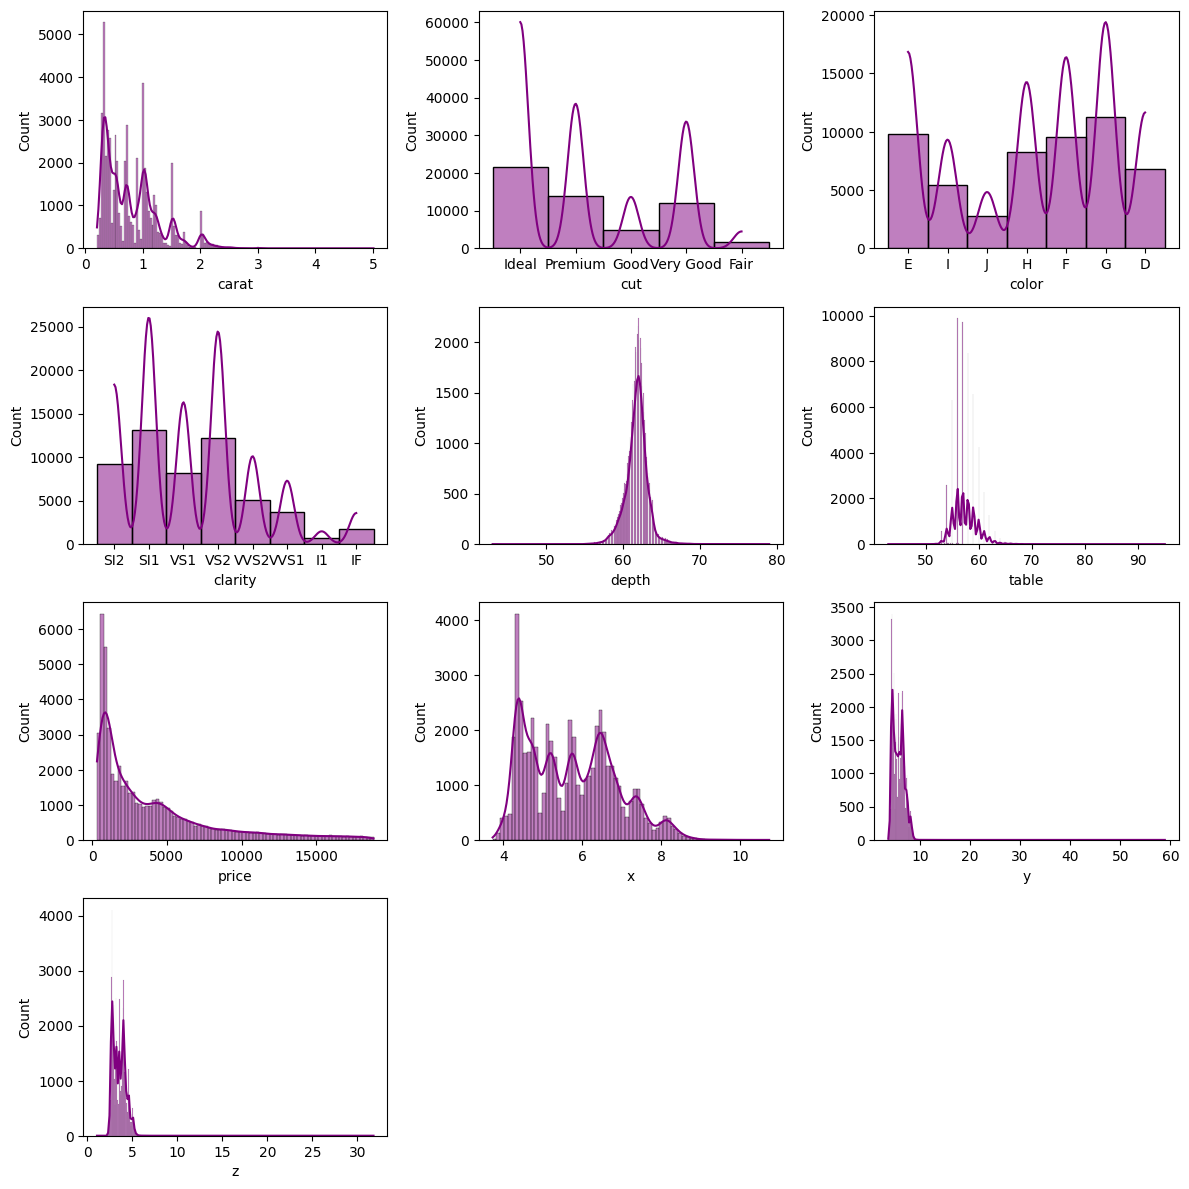

In [12]:
plt.figure(figsize=(12,12))
plotnumber=1
for column in df:
    ax=plt.subplot(4,3,plotnumber)
    sns.histplot(df[column], kde=True, color='purple')
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

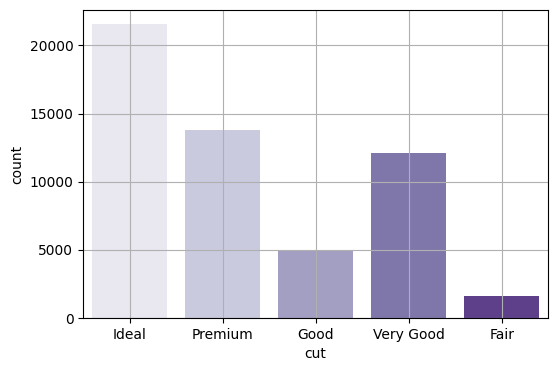

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='cut', data=df, palette='Purples')
plt.grid(True)

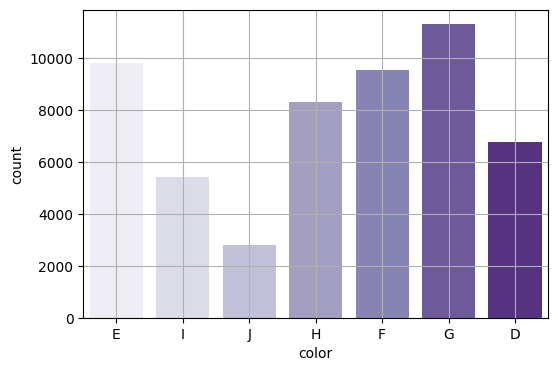

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='color', data=df, palette='Purples')
plt.grid(True)

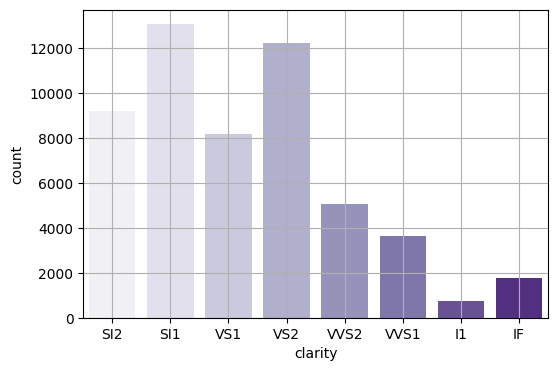

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='clarity', data=df, palette='Purples')
plt.grid(True)

<Figure size 500x500 with 0 Axes>

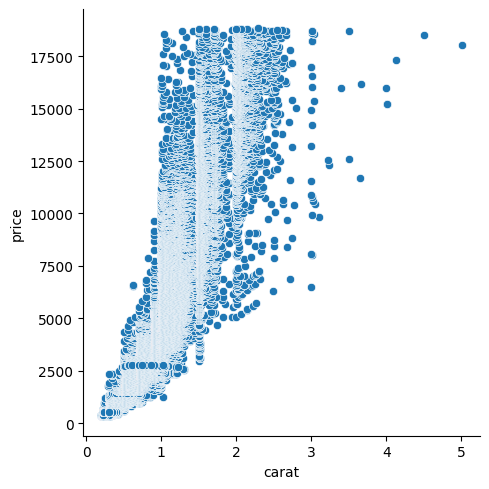

In [16]:
plt.figure(figsize=(5,5))
sns.relplot(x='carat', y='price', data=df, kind = 'scatter')

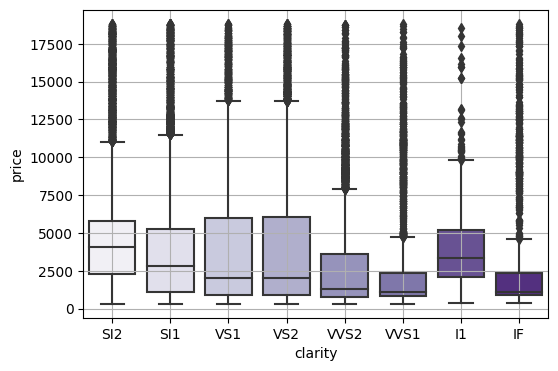

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='clarity',y='price', data=df, palette='Purples')
plt.grid(True)

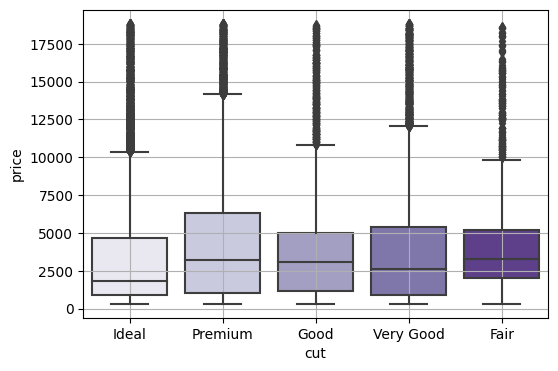

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='cut',y='price', data=df, palette='Purples')
plt.grid(True)

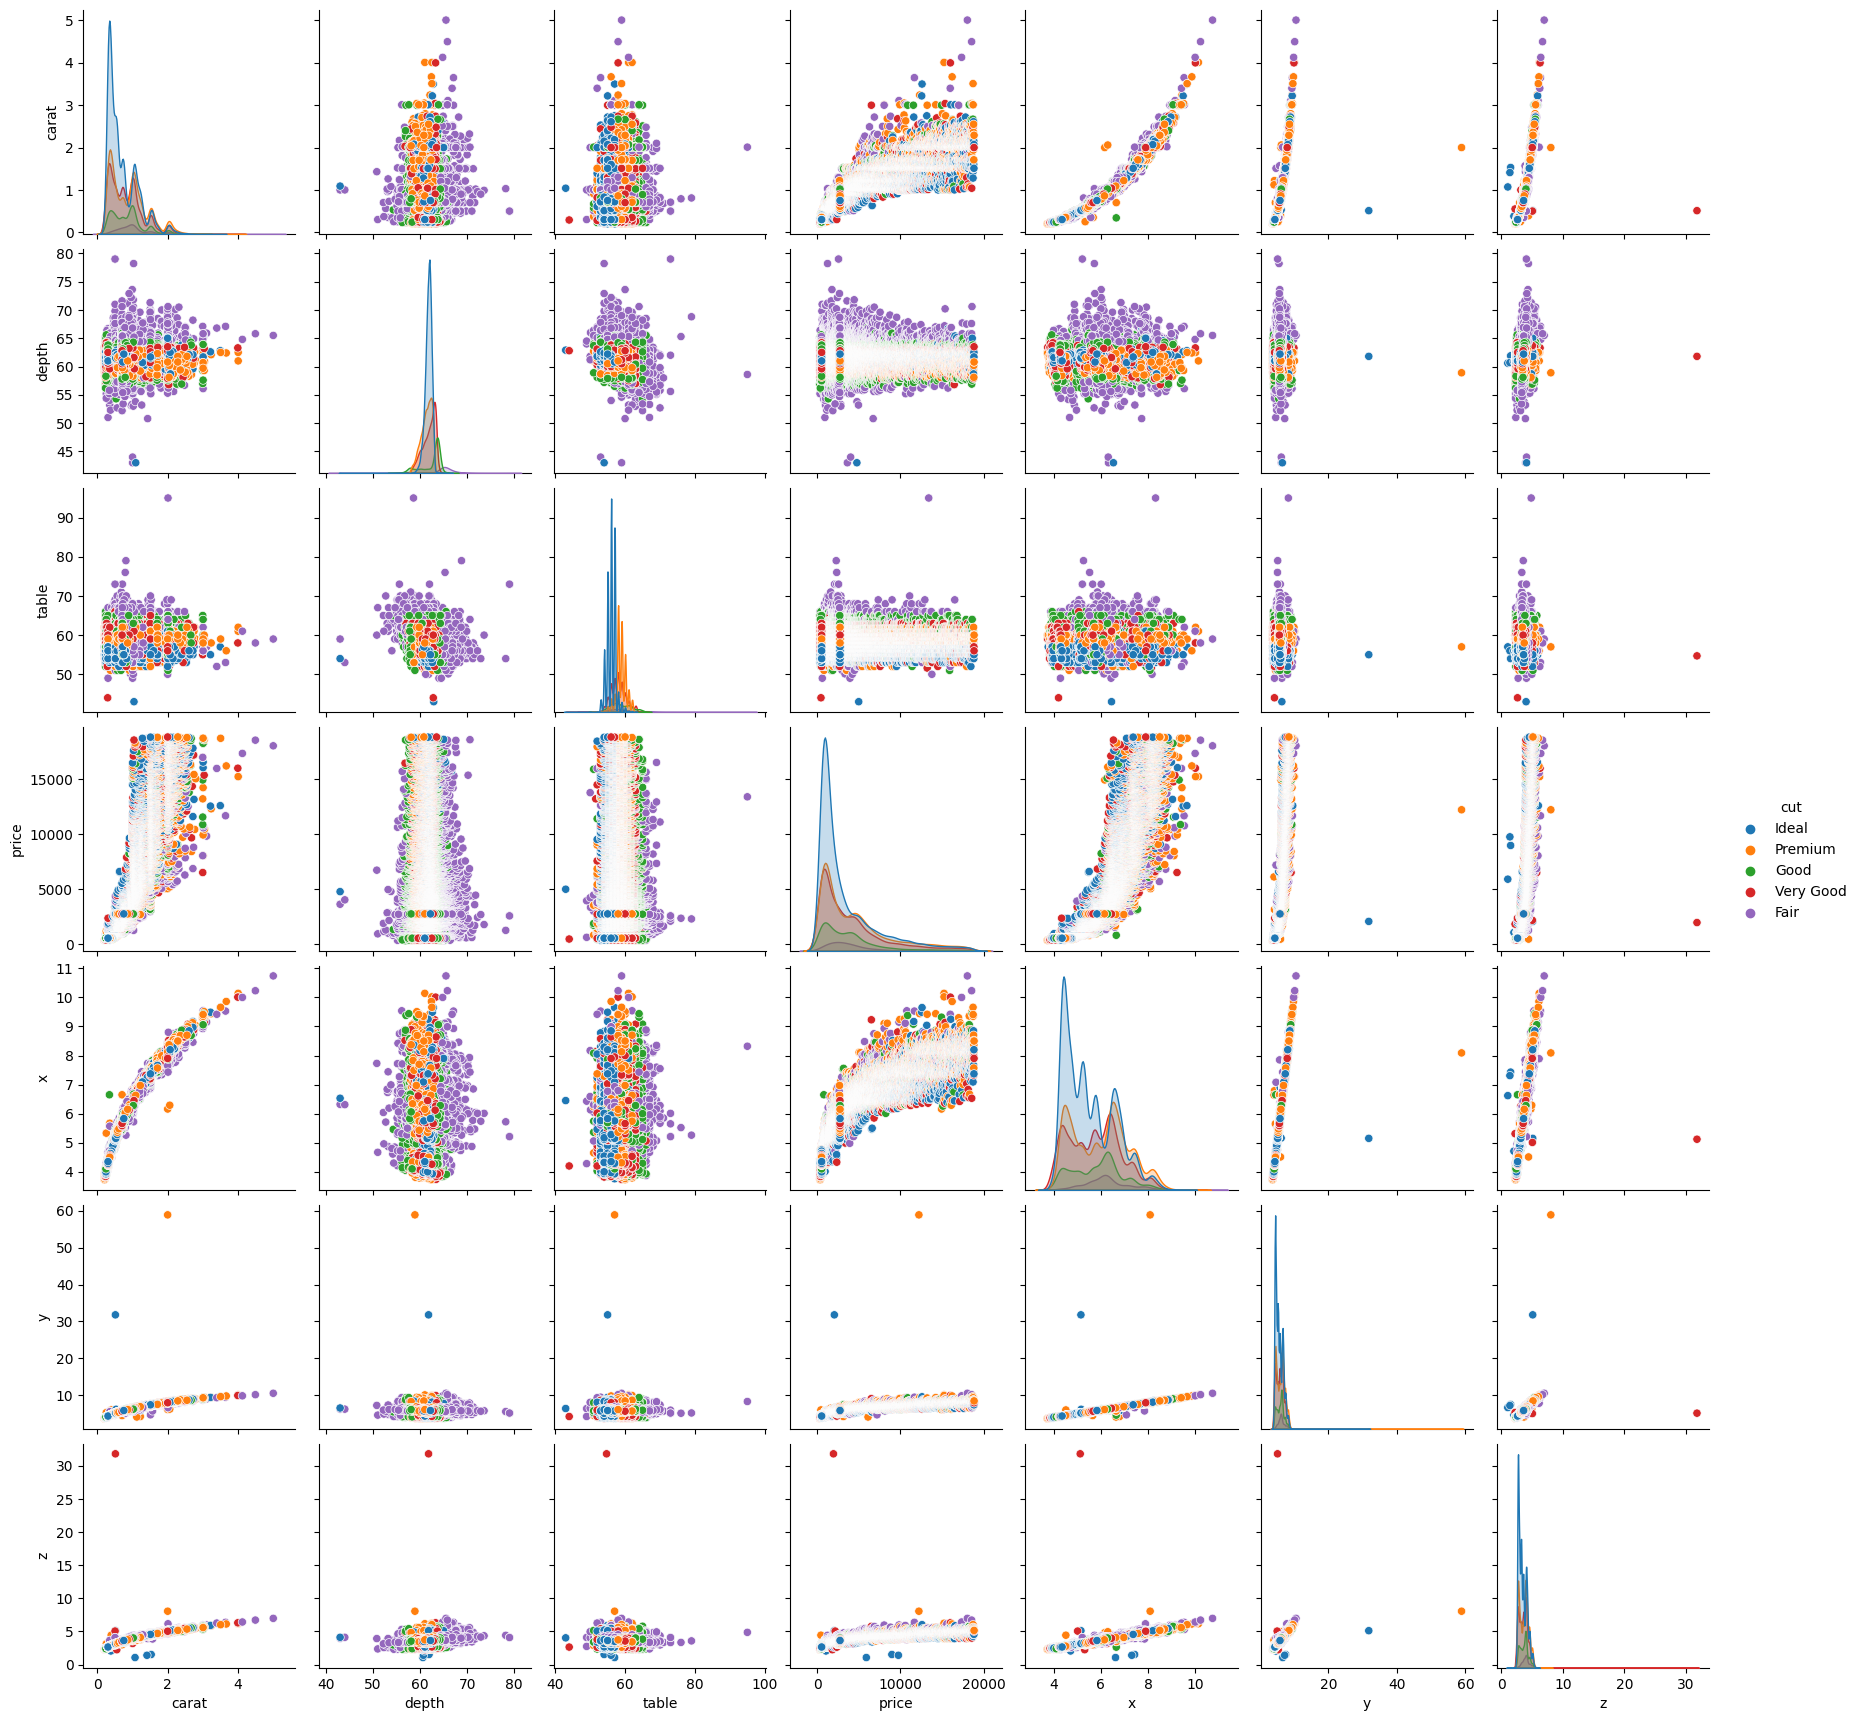

In [19]:
sns.pairplot(df, hue='cut')

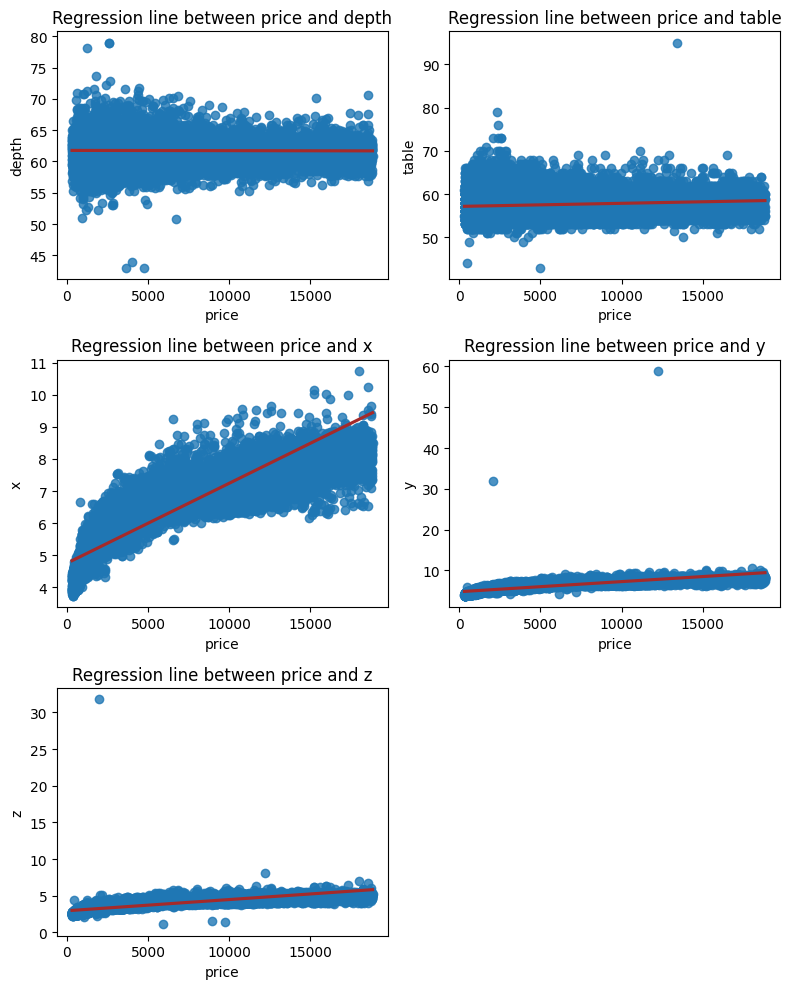

In [20]:
# regression line to check for outliers.
col = ['depth','table','x','y','z']
plt.figure(figsize=(8,10))
plotnumber=1
for i in col:
    ax=plt.subplot(3,2,plotnumber)
    sns.regplot(x='price', y=i, data=df, line_kws={'color':'brown'})
    plt.title(f"Regression line between price and {i}")
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='x'>

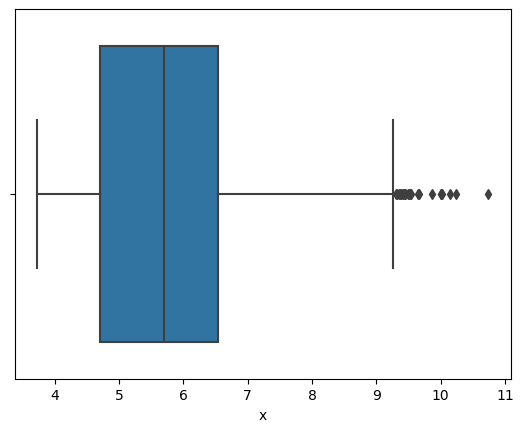

In [21]:
sns.boxplot(x='x', data=df)

In [22]:
#Drop the outliers. 

df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>45)]
df = df[(df["x"]<9.5)]
df = df[(df["y"]<15)]
df = df[(df["z"]<10)&(df["z"]>2)]
df.shape

(53893, 10)

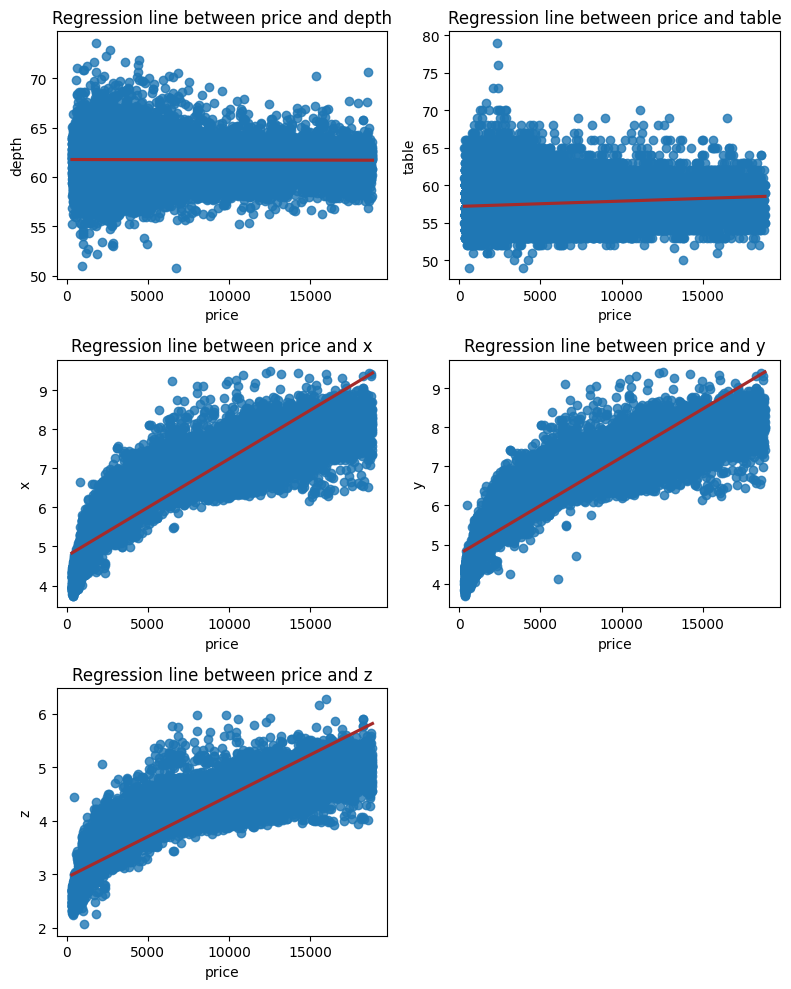

In [23]:
# let's check the relation once again.

col = ['depth','table','x','y','z']
plt.figure(figsize=(8,10))
plotnumber=1
for i in col:
    ax=plt.subplot(3,2,plotnumber)
    sns.regplot(x='price', y=i, data=df, line_kws={'color':'brown'})
    plt.title(f"Regression line between price and {i}")
    plotnumber+=1
plt.tight_layout()

## Encoding.

In [24]:
# Label Encoding.
encode_df = df.copy()
cat_col = ['cut','color','clarity']
le = LabelEncoder()
for column in cat_col:
    encode_df[column] = le.fit_transform(encode_df[column])
encode_df.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
27994,0.30,3,1,5,61.8,58.0,658,4.31,4.36,2.68
51432,0.73,4,0,3,60.3,60.0,2374,5.82,5.89,3.53
44296,0.52,2,1,2,61.6,55.0,1577,5.19,5.16,3.19
9380,0.36,3,3,5,62.5,58.0,589,4.51,4.55,2.83
19669,1.20,3,1,5,62.0,59.0,8279,6.78,6.71,4.18


<Axes: >

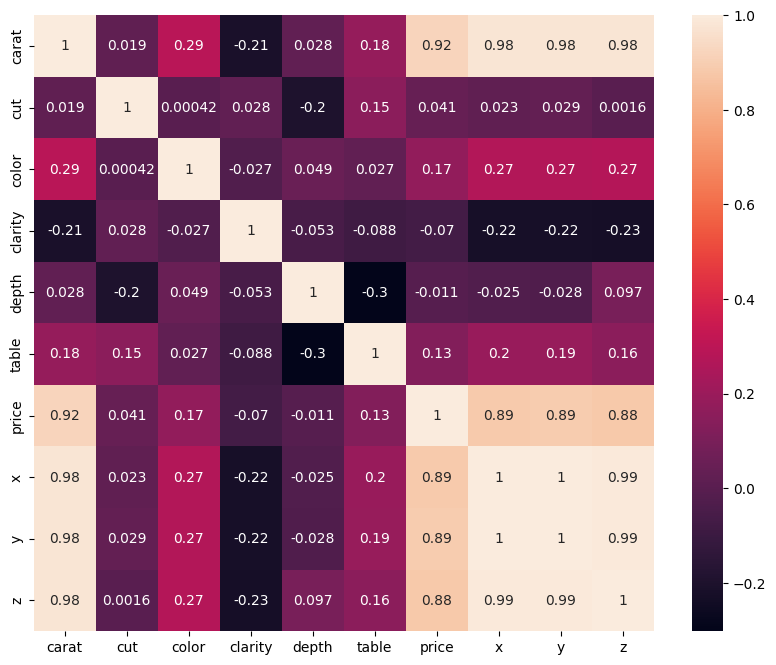

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(encode_df.corr(), annot=True)

## Models

In [26]:
X = encode_df.drop('price',axis=1)
y = encode_df['price']

# Train Test Split.

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [27]:
# Scaling.
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [28]:
R2_scores = [] # all models score.
models = {'Linear Regression': LinearRegression(),
          'K Neighbours Regression': KNeighborsRegressor(),
          'Decision Tree': DecisionTreeRegressor(),
          'Gradient Boosting Regression': GradientBoostingRegressor(),
          'Random Forest Regression': RandomForestRegressor(),
          'Support Vector Regression': SVR(),
          'XG Boost': XGBRegressor()}

In [29]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5

    print(name)
    print()
    print('R2 score:',r2)
    print('Mean squared error:',mse)
    print('Mean sabsolute error:',mae)
    print('Root Mean squared error:',rmse)
    print('==========================================')
    R2_scores.append({'Models': name,'R2-Score': r2})
score_df = pd.DataFrame(R2_scores)

Linear Regression

R2 score: 0.8906734336180373
Mean squared error: 1706670.2625902903
Mean sabsolute error: 843.2293516251343
Root Mean squared error: 1306.3959057614543
K Neighbours Regression

R2 score: 0.9603640558602533
Mean squared error: 618747.0203413982
Mean sabsolute error: 404.1290188511207
Root Mean squared error: 786.6047421299965
Decision Tree

R2 score: 0.9664278492656422
Mean squared error: 524086.6260204839
Mean sabsolute error: 356.26591954876056
Root Mean squared error: 723.9382750072577
Gradient Boosting Regression

R2 score: 0.9715601454166818
Mean squared error: 443967.60728917684
Mean sabsolute error: 363.8638297343459
Root Mean squared error: 666.308942825456
Random Forest Regression

R2 score: 0.9809879971166969
Mean squared error: 296791.72251555766
Mean sabsolute error: 271.47480688733856
Root Mean squared error: 544.7859419217402
Support Vector Regression

R2 score: 0.5072141777212289
Mean squared error: 7692758.828361401
Mean sabsolute error: 1354.090003906

In [30]:
score_df

,Models,R2-Score
0,Linear Regression,0.890673
1,K Neighbours Regression,0.960364
2,Decision Tree,0.966428
3,Gradient Boosting Regression,0.971560
4,Random Forest Regression,0.980988
5,Support Vector Regression,0.507214
6,XG Boost,0.980895


<Axes: xlabel='R2-Score', ylabel='Models'>

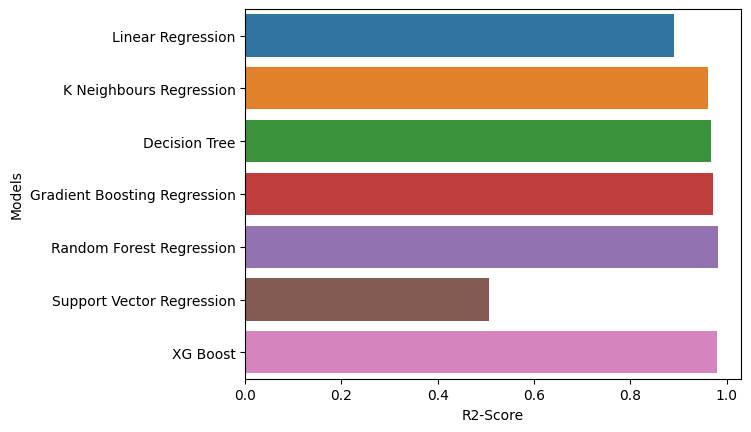

In [31]:
sns.barplot(x='R2-Score', y='Models', data=score_df)

- **XG Boost and Random Forest gives best R-2 score.**


- ***If this Notebook helps you, please upvote.***

- ***Comment for appreciation or any problem.***